# DS-SF-36 | 06 | $k$-Nearest Neighbors | Codealong | Starter Code

In [2]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, neighbors, model_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

SyntaxError: invalid syntax (<ipython-input-4-d0f862b98f8e>, line 1)

In [3]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-06-iris.csv'))

In [11]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Part A | Activity | Iris Dataset | Exploratory Data Analysis

In [4]:
color = df.Species.map({'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'})

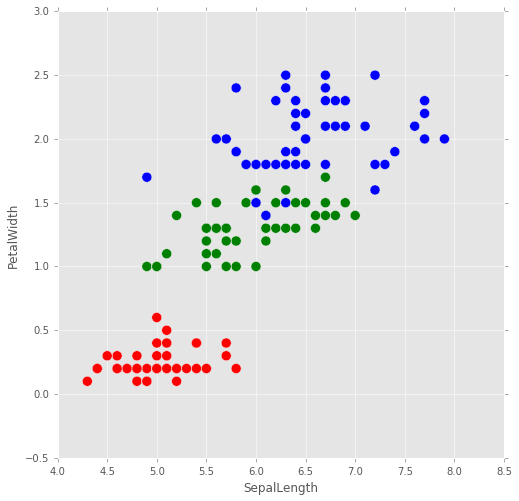

In [7]:
df.plot(kind = 'scatter', x = 'SepalLength', y = 'PetalWidth', s = 100, figsize = (8,8), c = color)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D9FC240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E520EF0>]], dtype=object)

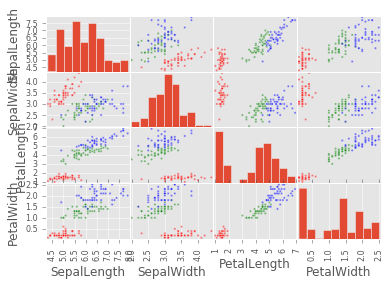

In [9]:
pd.tools.plotting.scatter_matrix (df[['SepalLength','SepalWidth','PetalLength','PetalWidth']], c=color)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E73DC18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010470B38>]], dtype=object)

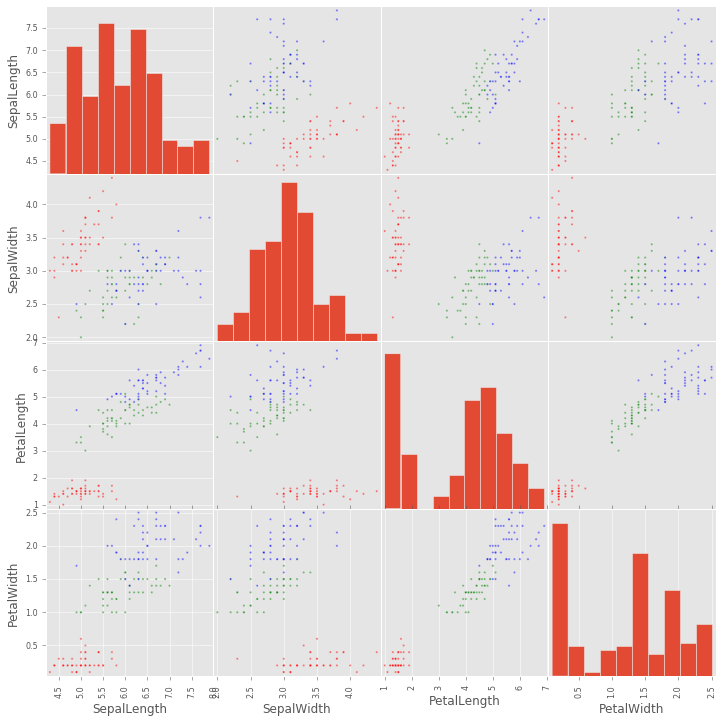

In [10]:
pd.tools.plotting.scatter_matrix(df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ], c = color, figsize = (12, 12))

## Part B | Activity | Hand-Coded Classifier

In [13]:
c = df.Species

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: Species, dtype: object

In [17]:
def my_first_classifier(row):
    if row.PetalLength > 5:
        return 'Virginica'
    elif row.PetalLength > 2.5:
        return 'Versicolor'
    else: return 'Setosa'

In [21]:
c_hat = df.apply(my_first_classifier, axis = 1)



In [25]:
(c_hat != c).sum()
c_hat != c

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146     True
147    False
148    False
149    False
dtype: bool

In [24]:
pd.crosstab(c_hat, c, rownames = ['Hypothesized Class'], colnames = ['True Class'])

True Class,Setosa,Versicolor,Virginica
Hypothesized Class,,,
Setosa,50,0,0
Versicolor,0,49,9
Virginica,0,1,41


## Part C | Classification Metrics

### Accuracy

In [27]:
# TODO
(c_hat == c).mean()

0.93333333333333335

### Misclassification rate

In [ ]:
# TODO

## Part D | $k$-Nearest Neighbors ($k$-NN)

### Feature matrix and response vector

- (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
columns_X = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)

In [ ]:
# TODO

In [ ]:
c = df.Species

In [ ]:
c

### $k$-Nearest Neighbors

- (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [31]:
model = neighbors.KNeighborsClassifier(n_neighbors = 1).\
    fit(X, c)

NameError: name 'X' is not defined

You can measure the precision of your prediction with `.score()`

In [ ]:
model.score(X, c)

In [ ]:
c_hat = model.predict(X)

In [ ]:
(c_hat == c).mean()

In [ ]:
pd.crosstab(c_hat, c, rownames = ['Hypothesized Class'], colnames = ['True Class'])

### Train/test sets

- (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html)

50% of the dataset to train the model; the rest to test the model

In [29]:
train_df = df.sample(frac = .5, random_state = 0).sort_index()

In [30]:
train_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
2,4.7,3.2,1.3,0.2,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
10,5.4,3.7,1.5,0.2,Setosa
13,4.3,3.0,1.1,0.1,Setosa
...,...,...,...,...,...
137,6.4,3.1,5.5,1.8,Virginica
141,6.9,3.1,5.1,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
146,6.3,2.5,5.0,1.9,Virginica


In [ ]:
test_df = df.drop(train_df.index)

### Feature matrix `train_X` and response vector `train_c`

In [28]:
train_X = train_df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(train_X)
train_X = scaler.transform(train_X)

train_c = train_df.Species

NameError: name 'train_df' is not defined

### Feature matrix `test_X` and response vector `test_c`

- (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [ ]:
# TODO

In [ ]:
k_cv = 5 # 5-fold CV
k_nn = range(1, train_df.shape[0] * (k_cv - 1) / k_cv) # k-NN

gs = model_selection.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn, 'weights': ['uniform', 'distance']},
    cv = model_selection.KFold(n_splits = k_cv, shuffle = True, random_state = 0)
)

gs.fit(train_X, train_c)

In [ ]:
gs.cv_results_

In [ ]:
gs.cv_results_.keys()

In [ ]:
gs.best_score_

In [ ]:
gs.best_params_

In [ ]:
gs.best_estimator_

In [ ]:
gs.score(train_X, train_c)

In [ ]:
gs.score(test_X, test_c)

## Final model

In [ ]:
# TODO